In [5]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statsmodels as sm
from io import StringIO
from shutil import copyfile
import pickle 

In [6]:
df = pd.read_csv('data/data.csv')

In [7]:
df= df.drop(['Finishing',
                    'HeadingAccuracy',
                    'ShortPassing',
                    'Volleys',
                    'Dribbling',
                    'Curve',
                    'FKAccuracy',
                    'LongPassing',
                    'BallControl',
                    'Acceleration',
                    'SprintSpeed',
                    'Agility',
                    'Reactions',
                    'Balance',
                    'ShotPower',
                    'Jumping',
                    'Stamina',
                    'Strength',
                    'LongShots',
                    'Aggression',
                    'Interceptions',
                    'Positioning',
                    'Vision',
                    'Penalties',
                    'Composure',
                    'Marking',
                    'StandingTackle',
                    'SlidingTackle',
                    'GKDiving',
                    'GKHandling',
                    'GKKicking',
                    'GKPositioning',
                    'GKReflexes','LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','Crossing'], axis=1)

In [8]:
cols = ['Wage','Value','Release Clause']

In [9]:
df2 = df[cols].apply(lambda x: x.str.strip('€'))

In [10]:
df2 = df2.fillna(0)

In [11]:
df1= df2[cols].apply(lambda x: x.str.get(-1))

In [12]:
df1['V'] = df1['Value'].apply(
               lambda x: (1000 if x == 'K' else 1000000))

In [13]:
df1['R'] = df1['Release Clause'].apply(
               lambda x: (1000 if x == 'K' else 1000000))

In [14]:
df1['W'] = df1['Wage'].apply(
               lambda x: (1000 if x == 'K' else 1000000))

In [15]:
df2 = df2[cols].apply(lambda x: x.str.strip('M|K'))

In [16]:
df1 = df1.drop(['Wage','Value','Release Clause'], axis=1)

In [17]:
df1= pd.concat([df1,df2], axis=1)

In [18]:
df1

,V,R,W,Wage,Value,Release Clause
0,1000000,1000000,1000,565,110.5,226.5
1,1000000,1000000,1000,405,77,127.1
2,1000000,1000000,1000,290,118.5,228.1
3,1000000,1000000,1000,260,72,138.6
4,1000000,1000000,1000,355,102,196.4
5,1000000,1000000,1000,340,93,172.1
6,1000000,1000000,1000,420,67,137.4
7,1000000,1000000,1000,455,80,164
8,1000000,1000000,1000,380,51,104.6
9,1000000,1000000,1000,94,68,144.5


In [19]:
df1 = df1.astype('float')

In [20]:
df1['Value'] = df1['Value']*df1['V']
df1['Release Clause'] = df1['Release Clause']*df1['R']
df1['Wage'] = df1['Wage']*df1['W']

In [21]:
df1 = df1.drop(['V','R','W'], axis=1)

In [22]:
df = df.drop(['Wage','Value','Release Clause'], axis=1)

In [23]:
df1 = pd.concat([df,df1],axis=1)

In [24]:
df1.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Wage,Value,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,565000.0,110500000.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,405000.0,77000000.0,127100000.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,290000.0,118500000.0,228100000.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,260000.0,72000000.0,138600000.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,355000.0,102000000.0,196400000.0
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,340000.0,93000000.0,172100000.0
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,RCM,10.0,"Aug 1, 2012",NaN,2020,5'8,146lbs,420000.0,67000000.0,137400000.0
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,RS,9.0,"Jul 11, 2014",NaN,2021,6'0,190lbs,455000.0,80000000.0,164000000.0
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,RCB,15.0,"Aug 1, 2005",NaN,2020,6'0,181lbs,380000.0,51000000.0,104600000.0
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,GK,1.0,"Jul 16, 2014",NaN,2021,6'2,192lbs,94000.0,68000000.0,144500000.0


In [52]:
pickle.dump( df1, open( "save.p", "wb" ) )

In [26]:
topwage = df1[['Name','Wage']].nlargest(10,'Wage') 

In [27]:
topwage

,Name,Wage
0,L. Messi,565000.0
7,L. Suárez,455000.0
6,L. Modrić,420000.0
1,Cristiano Ronaldo,405000.0
8,Sergio Ramos,380000.0
4,K. De Bruyne,355000.0
11,T. Kroos,355000.0
36,G. Bale,355000.0
5,E. Hazard,340000.0
32,Coutinho,340000.0


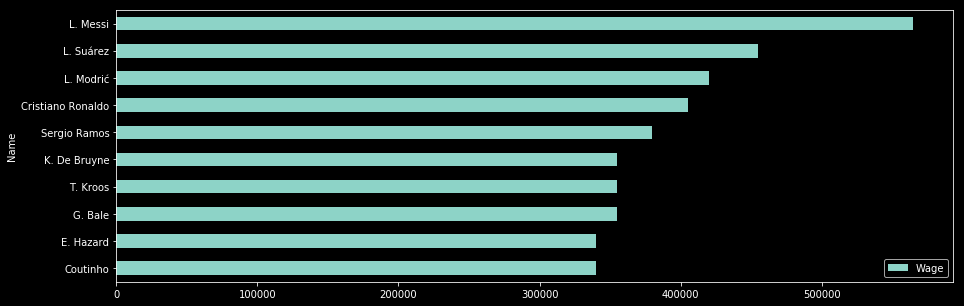

In [28]:
plt.style.use('dark_background')
topwage.set_index('Name').plot(figsize=(15,5), kind='barh').invert_yaxis()             

In [29]:
marketvalue= df1[['Wage','Name','Value']]

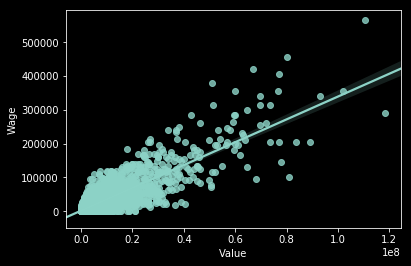

In [30]:
sns.regplot(x='Value',y='Wage',data=marketvalue)

In [31]:
Ratings= df1[['Overall','Value','Name']]

In [32]:
topnations = df1[['Nationality','Value']]

In [33]:
topnations =topnations.set_index('Nationality')

In [34]:
topnations =topnations.groupby('Nationality')['Value'].sum()

In [35]:
topnations = topnations.nlargest(10)

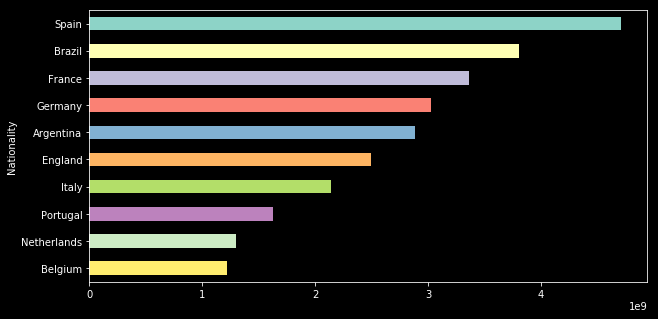

In [36]:
topnations.plot(figsize=(10,5), kind='barh').invert_yaxis()

In [37]:
topclubs=df1[['Club','Value','Name']]

In [38]:
topclubs =topclubs.groupby('Club')['Value','Name'].sum()

In [39]:
topclubs= topclubs.nlargest(10,'Value')

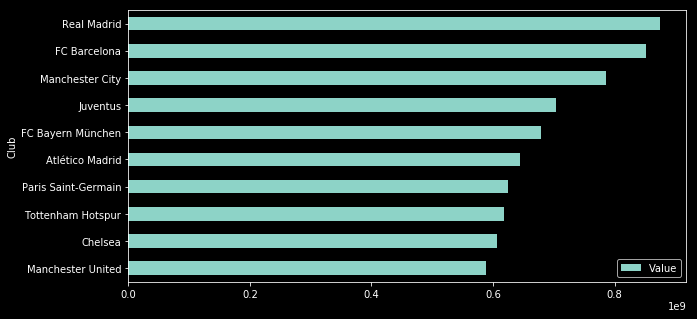

In [40]:
topclubs.plot(figsize=(10,5), kind='barh').invert_yaxis()

In [41]:
topclubspercent=df1[['Club','Value','Name']]

In [42]:
topclubspercent=topclubspercent.Value.quantile(.9)

In [43]:
topclubspercent

6500000.0

In [44]:
growth=df1[['Name','Overall','Potential']]

In [45]:
growth['Highest_Potential']= growth['Potential']-growth['Overall']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
growth = growth.drop(['Overall','Potential'],axis=1)

In [47]:
growth= growth.nlargest(10,'Highest_Potential')

In [48]:
loan =df1.groupby('Loaned From')['Club'].count()

In [49]:
loan=loan.nlargest(17)

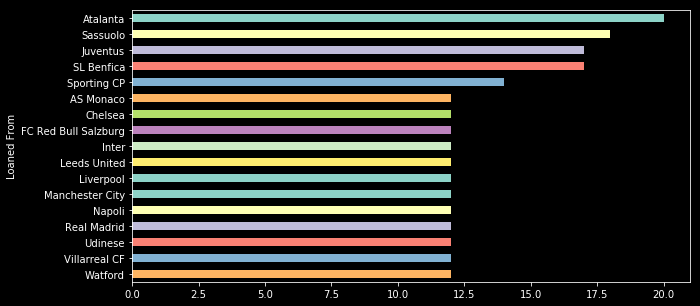

In [50]:
loan.plot(figsize=(10,5), kind='barh').invert_yaxis()